## S13 T01 Bases de dades relacionals
### Aprendre a crear un model relacional i diagrama entitat-relació.
#### Eloi Canals

In [1]:
import mysql.connector
from mysql.connector import Error

In [2]:
import pandas as pd
from IPython.display import Image

Nivell 1 - Exercici 1.
Crea una base relacional d’exemple utilitzant un document de text o a mà. Dissenya-la perquè contingui les següents taules, i estableix les relacions que consideris necessàries

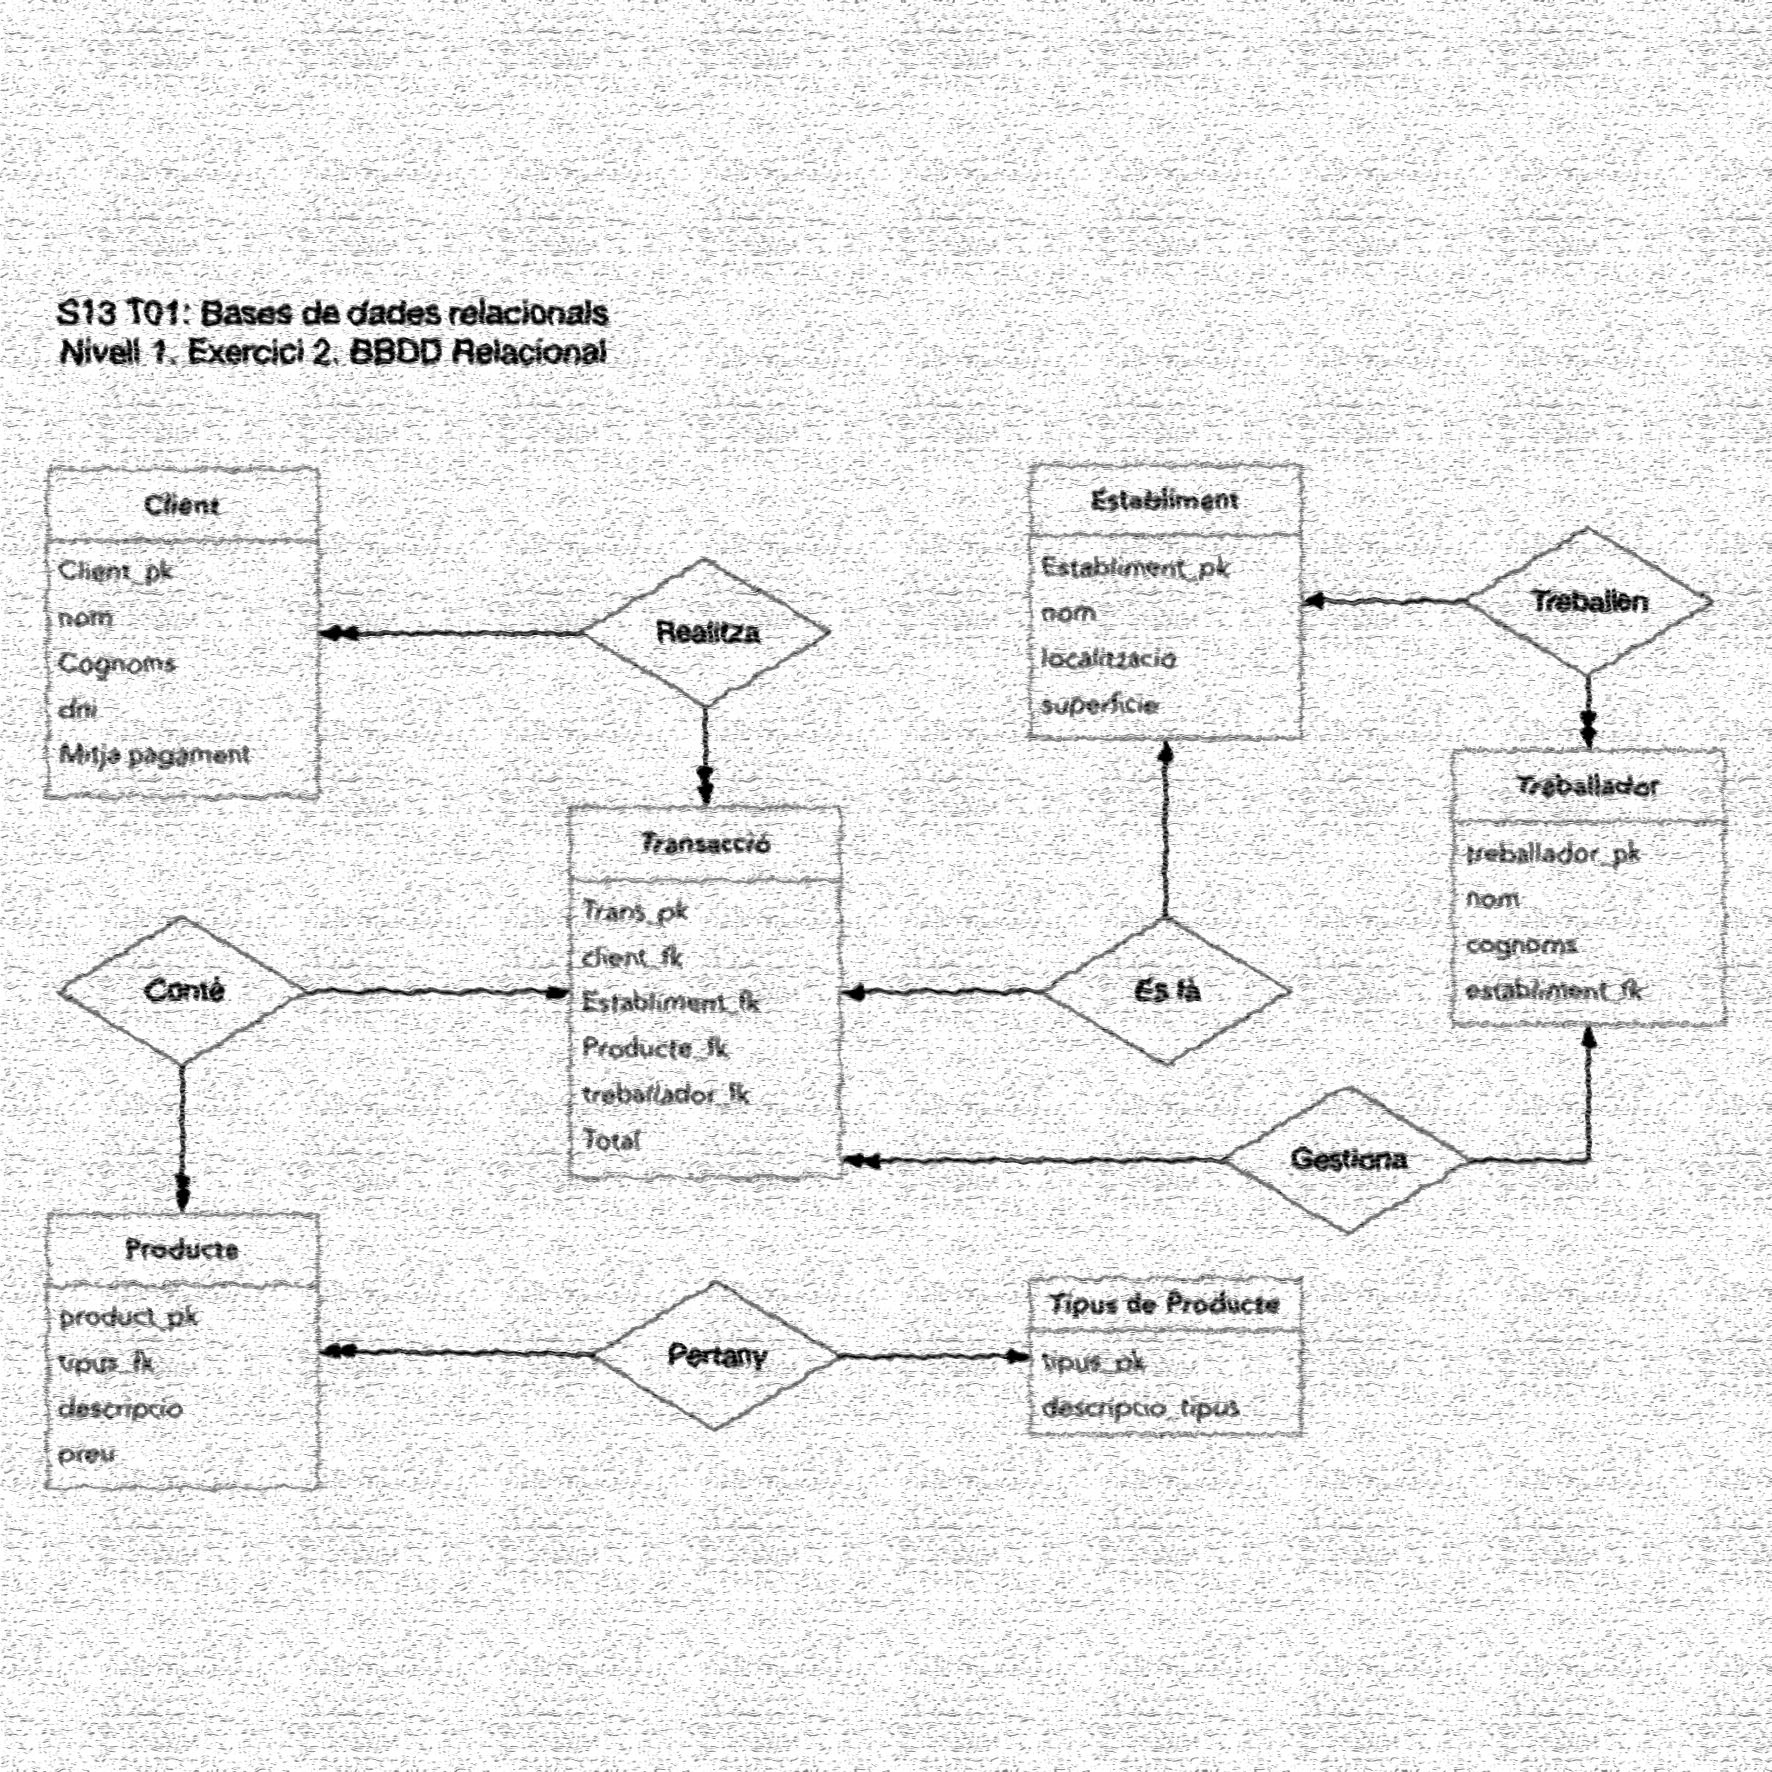

In [3]:
Image(filename='BBDD Relacional.jpg')

Nivell 2 - Exercici 2.
Utilitza un programa de creació de diagrames entitat-relació com http://dia-installer.de per crear el diagrama.

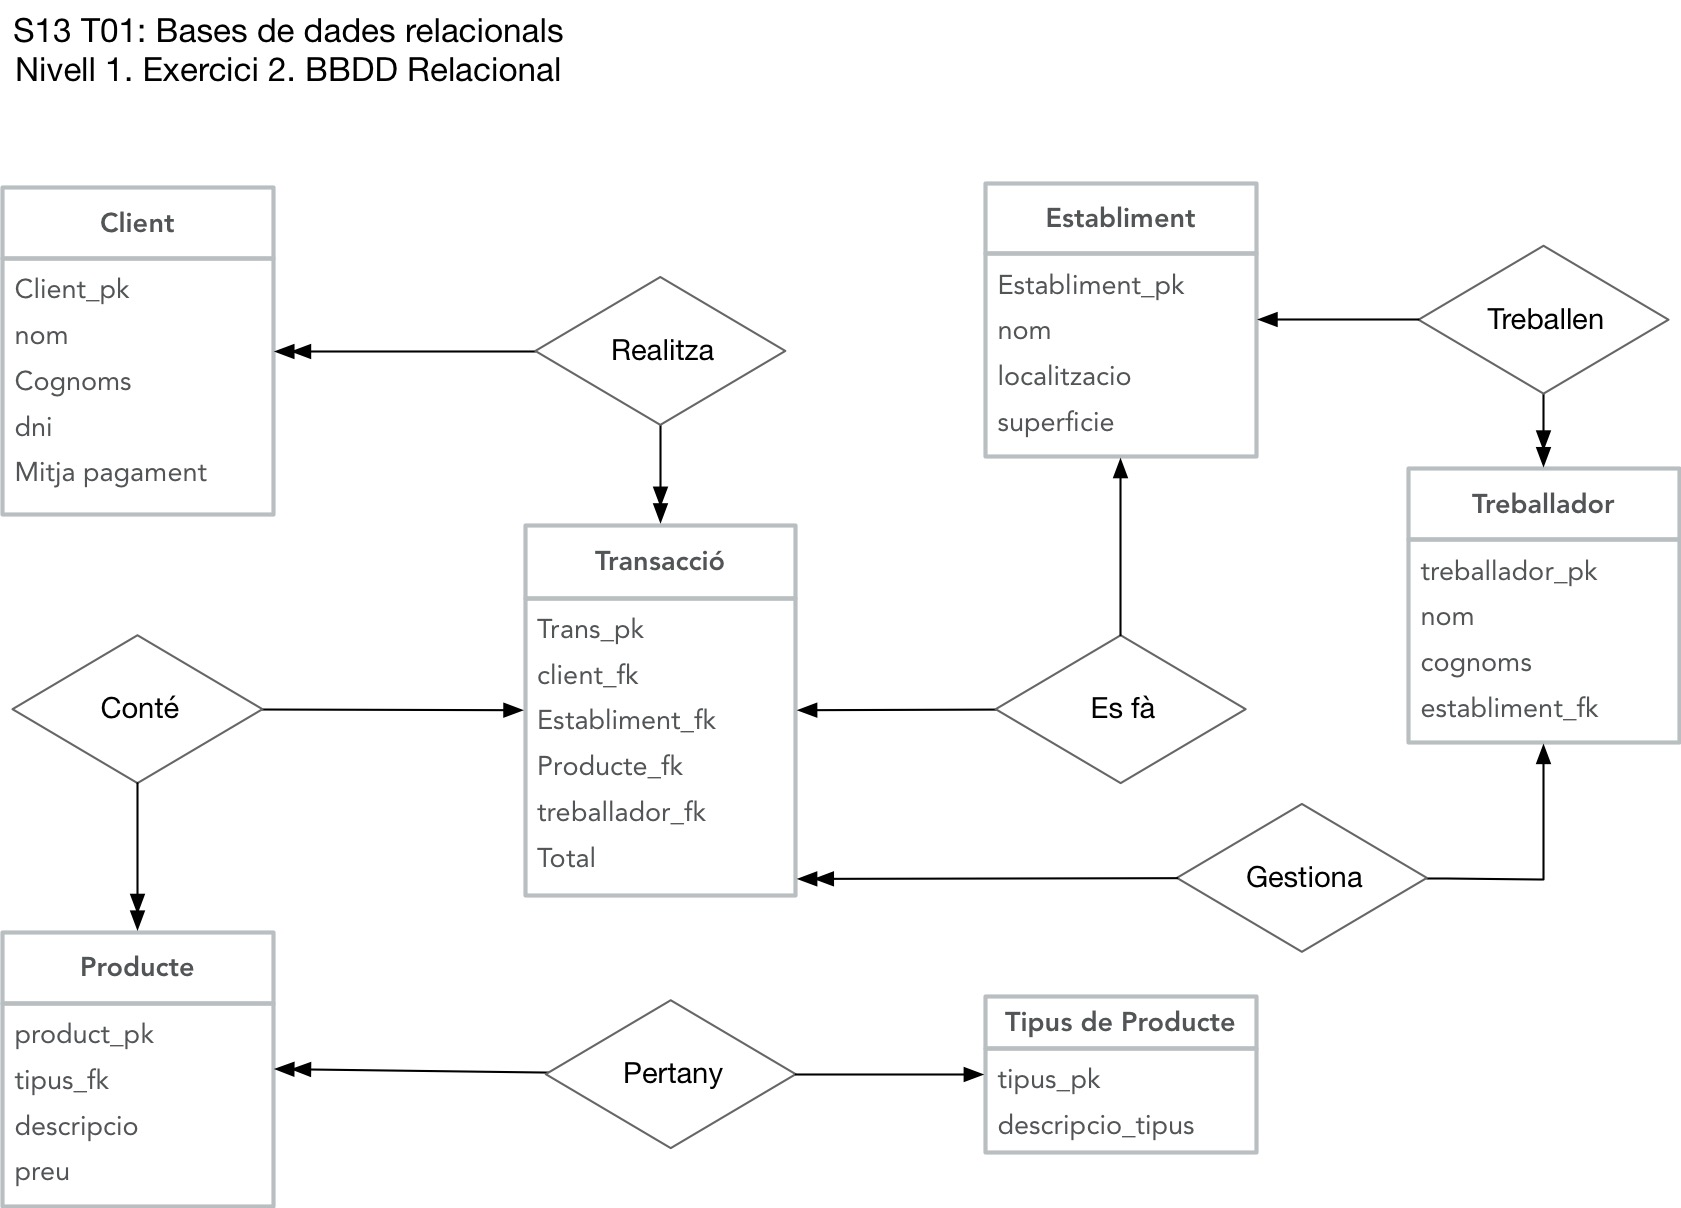

In [4]:
Image(filename='BBDD Relacional_OK.jpg')

Nivell 3 - Exercici 3.
Utilitza el Workbench de MySQL per crear un model relacional

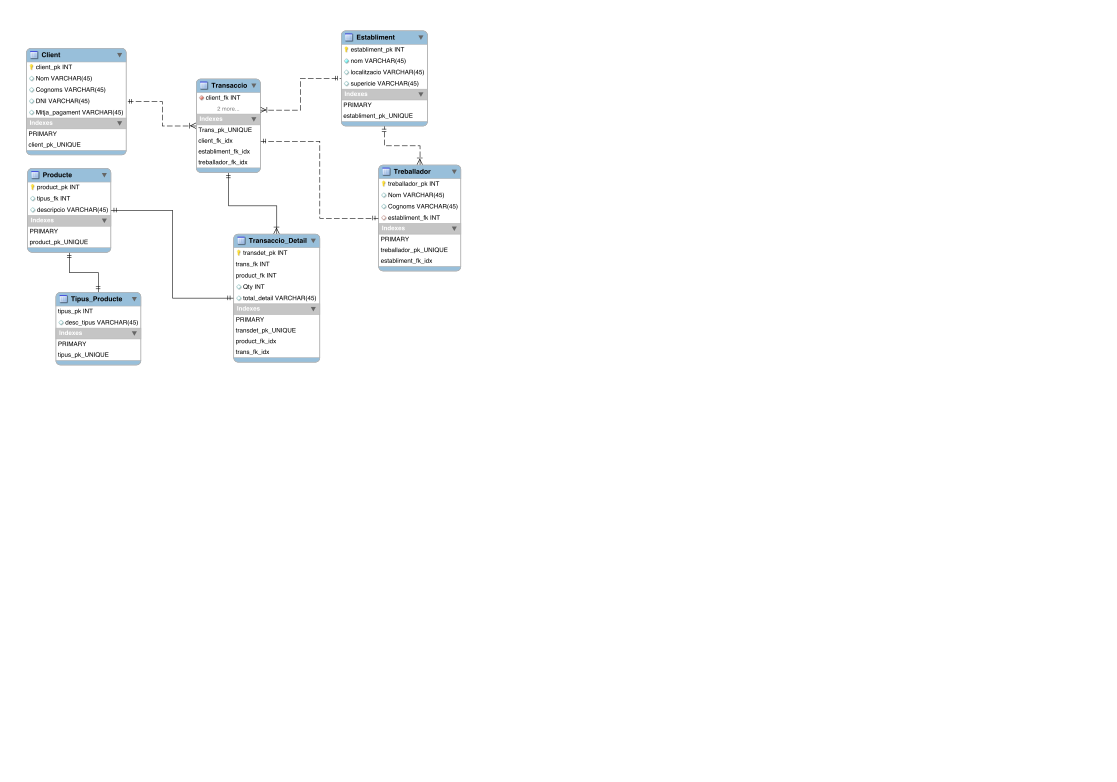

In [5]:
from IPython.core.display import SVG
SVG(filename='BBDD Relacional.svg')

In [6]:
from IPython import display
display.Pretty("DeployDDBB.sql")

-- MySQL Workbench Forward Engineering

SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0;
SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0;
SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION';

-- -----------------------------------------------------
-- Schema mydb
-- -----------------------------------------------------

-- -----------------------------------------------------
-- Schema mydb
-- -----------------------------------------------------
CREATE SCHEMA IF NOT EXISTS `mydb` DEFAULT CHARACTER SET utf8 ;
USE `mydb` ;

-- -----------------------------------------------------
-- Table `mydb`.`Client`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `mydb`.`Client` (
  `client_pk` INT NOT NULL AUTO_INCREMENT,
  `Nom` VARCHAR(45) NULL,
  `Cognoms` VARCHAR(45) NULL,
  `DNI` VARCHAR(45) NULL,
  `Mitja_pagament` VARCH

In [10]:
# Obrim conexió a la BBDD en local
db = mysql.connector.connect(
     host="localhost",
     user="eloi",
     password="eloi",
    )

print(db)

In [11]:
# Instanciem la BBDD
myDDBB = db.cursor()
myDDBB.execute("USE myDB")

In [12]:
# Insertem dades
clients = [["Elon", "Musk"],
           ["Steve", "Jobs"],
           ["Steve", "Wozniak"],
           ["Bill", "Gates"]]

clients

[['Elon', 'Musk'], ['Steve', 'Jobs'], ['Steve', 'Wozniak'], ['Bill', 'Gates']]

In [13]:
sql_insert_clients = "INSERT INTO Client (Nom, Cognoms) VALUES (%s, %s)"
for i in range(0,4):
    myDDBB.execute(sql_insert_clients, clients[i])
db.commit()

print(myDDBB.rowcount, "record inserted.")

1 record inserted.


In [14]:
# Comprovem dades
sql_Select_all_clients = "SELECT * FROM Client"
myDDBB.execute(sql_Select_all_clients)
myresult = myDDBB.fetchall()
for i in myresult:
    print(i)

(1, 'Elon', 'Musk', None, None)
(2, 'Steve', 'Jobs', None, None)
(3, 'Steve', 'Wozniak', None, None)
(4, 'Bill', 'Gates', None, None)


In [15]:
# Fem una cerca amb condició
select_cond = sql_Select_all_clients + " WHERE Nom = 'Steve'"
myDDBB.execute(select_cond)
myresult = myDDBB.fetchall()
for i in myresult:
    print(i)

(2, 'Steve', 'Jobs', None, None)
(3, 'Steve', 'Wozniak', None, None)


In [16]:
# Ordenem el resultat
select_ordered = sql_Select_all_clients + ' ORDER BY Cognoms'
myDDBB.execute(select_ordered)
myresult = myDDBB.fetchall()
for x in myresult:
    print(x)

(4, 'Bill', 'Gates', None, None)
(2, 'Steve', 'Jobs', None, None)
(1, 'Elon', 'Musk', None, None)
(3, 'Steve', 'Wozniak', None, None)
